# Data Wrangling for Second Capstone Project

In [1]:
#Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
#load the dataset
file = '/Users/sangeetajayakar/Springboard_Course/Files_for_second_capstone/weatherAUS.csv'
df = pd.read_csv(file)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [63]:
df.isnull().sum()

Date                    0
Location                0
MinTemp              1485
MaxTemp              1261
Rainfall             3261
Evaporation         62790
Sunshine            69835
WindGustDir         10326
WindGustSpeed       10263
WindDir9am          10566
WindDir3pm           4228
WindSpeed9am         1767
WindSpeed3pm         3062
Humidity9am          2654
Humidity3pm          4507
Pressure9am         15065
Pressure3pm         15028
Cloud9am            55888
Cloud3pm            59358
Temp9am              1767
Temp3pm              3609
RainToday            3261
RainTomorrow         3267
RainToday_Yes           0
RainTomorrow_Yes        0
dtype: int64

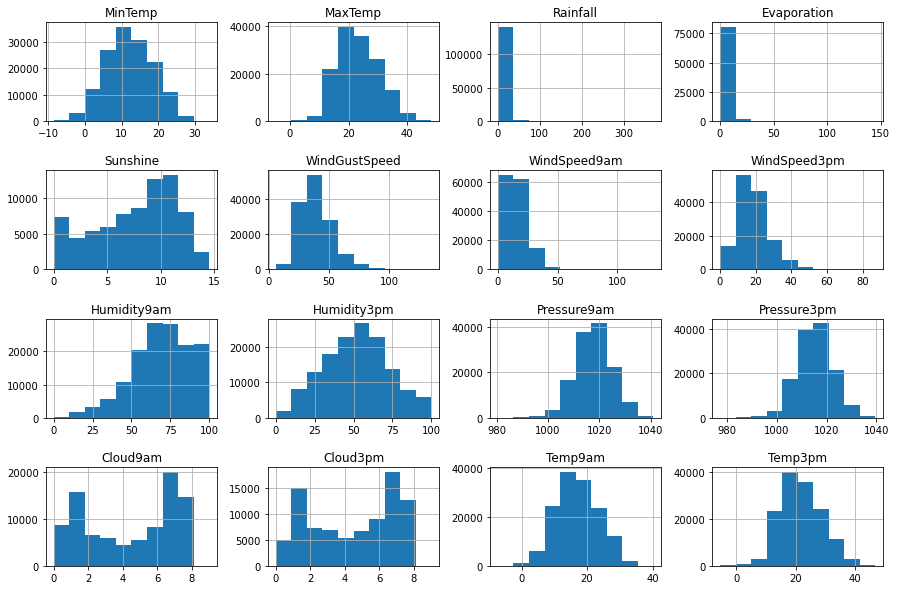

In [5]:
#Call `hist` method to plot histograms of each of the numeric features
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

#### Initial Observations from the dataset:
1. 23 Columns of data including 19 numerical columns and 4 categorical columns. 
2. The target feature has been identified as RainTomorrow
3. some of the numerical data look like they are normally distributed
4. Some columns to further examine based on odd-shaped histograms are Rainfall, Evaporation, all 3 of the Windspeed columns, and both of the Cloud columns.
5. Some columns are missing a large amount of data: Evaporation, Sunshine, Cloud9am, Cloud3pm. These may need to be removed prior to modeling. 

## Exploring the Target Feature
The feature RainTomorrow is the feature we want to predict. 
RainTomorrow will be examined, as well as RainToday to see how these differ from eachother.

In [6]:
#Examination of the Target Feature 'RainTomorrow'
#Target Feature is RainTomorrow. RainToday and RainTomorrow are both categorical with either 'Yes' or 'No'

df.groupby(['RainToday'])[['RainToday']].count()

,RainToday
RainToday,
No,110319
Yes,31880


In [7]:
df.groupby(['RainTomorrow'])[['RainTomorrow']].count()

,RainTomorrow
RainTomorrow,
No,110316
Yes,31877


Text(0, 0.5, 'Count')

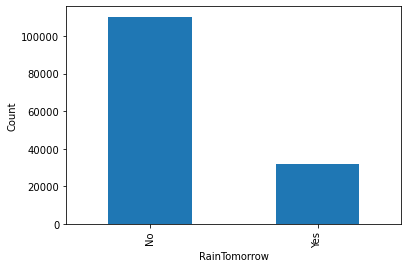

In [8]:
#Boxplot of RainTomorrow counts
df.groupby(['RainTomorrow'])['RainTomorrow'].count().plot(kind='bar').set_ylabel('Count')

In [62]:
# count missing values in Target Feature
df['RainTomorrow'].isnull().sum()

3267

In [10]:
#'RainToday' and 'RainTomorrow' columns
#We will add a column where we convert these columns to Booleans for easier analysis later on.
#df.info()
df['RainToday_Yes'] = df['RainToday'] == 'Yes'
df['RainTomorrow_Yes'] = df['RainTomorrow'] == 'Yes'
#df[['RainToday_Yes','RainTomorrow_Yes']].head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              145460 non-null  object 
 1   Location          145460 non-null  object 
 2   MinTemp           143975 non-null  float64
 3   MaxTemp           144199 non-null  float64
 4   Rainfall          142199 non-null  float64
 5   Evaporation       82670 non-null   float64
 6   Sunshine          75625 non-null   float64
 7   WindGustDir       135134 non-null  object 
 8   WindGustSpeed     135197 non-null  float64
 9   WindDir9am        134894 non-null  object 
 10  WindDir3pm        141232 non-null  object 
 11  WindSpeed9am      143693 non-null  float64
 12  WindSpeed3pm      142398 non-null  float64
 13  Humidity9am       142806 non-null  float64
 14  Humidity3pm       140953 non-null  float64
 15  Pressure9am       130395 non-null  float64
 16  Pressure3pm       13

#### Initial observations about Target Feature:
1. There are 3267 null values in this column. These entries may need to be eliminated later.
2. It is not clear what the relationship is between RainToday and RainTomorrow columns. Perhaps a correlation analysis can be done in the EDA section. 
3. RainTomorrow was converted into a Boolean by adding a new column so that in the next section, ratio of Yes to No rain could be used to compare to other features. 

## Explore the categorical features 
Location, WindGustDir, WindDir9am, WinDir3pm are categorical features

In [11]:
# Identify the unique locations
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [12]:
# How many unique locations are there?
len(df['Location'].unique())

49

<AxesSubplot:title={'center':'Records for each Location'}, xlabel='Location', ylabel='Count'>

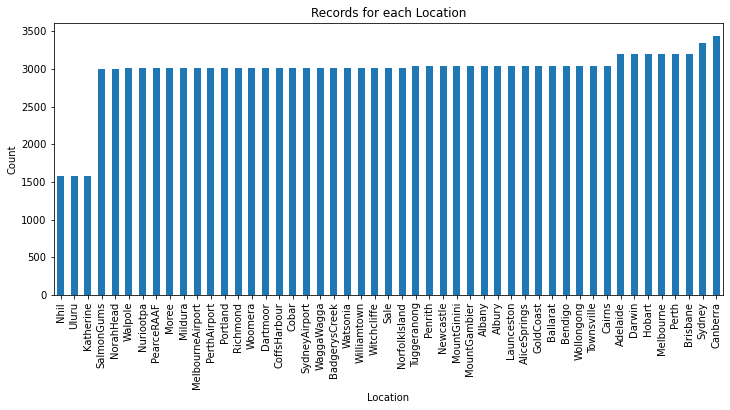

In [13]:
# How many records or rows are there for each location? 
cities = df.groupby(['Location'])['Location'].count().sort_values()
cities.plot(kind='bar', figsize=[12,5], ylabel='Count', title='Records for each Location')
# Most locations have a similar number of records ~3000 while 3 locatons have about half that amount.

<AxesSubplot:title={'center':'Ratio of Rainy Days Across Locations'}, xlabel='Location', ylabel='Ratio of Rain'>

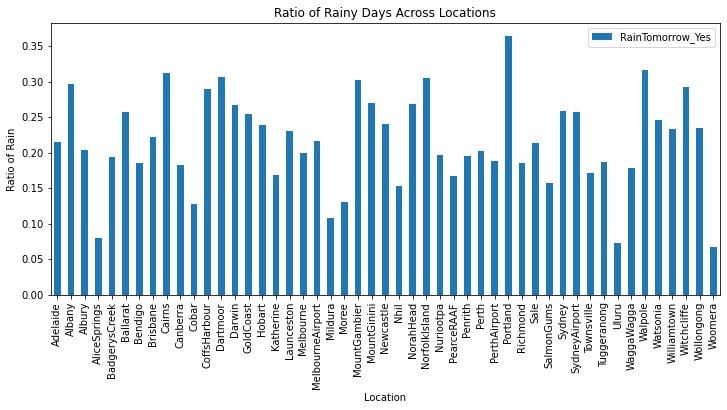

In [23]:
# Ratio of RainTomorrow_Yes (True/False) averaged for each location
rain_locations = df.groupby(['Location' ])[['RainTomorrow_Yes']].mean()
rain_locations.plot(kind='bar', figsize=(12, 5),ylabel='Ratio of Rain', title='Ratio of Rainy Days Across Locations')
# Rain varies between different locations

In [64]:
rain_locations

,RainTomorrow_Yes
Location,
Adelaide,0.215471
Albany,0.296711
Albury,0.203289
AliceSprings,0.080263
BadgerysCreek,0.193752
Ballarat,0.256908
Bendigo,0.184868
Brisbane,0.222048
Cairns,0.312500


In [25]:
rain_locations.describe()

,RainTomorrow_Yes
count,49.000000
mean,0.216548
std,0.066059
min,0.067132
25%,0.183062
50%,0.215471
75%,0.258672
max,0.363908


<AxesSubplot:ylabel='Frequency'>

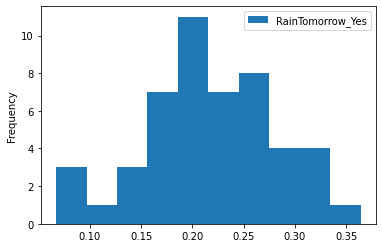

In [17]:
rain_locations.plot(kind='hist', bins=10)

#### Initial Observations about Location
1. 3 out of 49 Unique Locations have half as many entries as the other Locations. Depending on whether they have Target Feature, it may be decided later to remove these or keep these.
2. This preliminary comparison of ratio of days with rain grouped by Location suggests that Location will be an important feature in this model.
3. There are no null values in the Location column.

### other categorical features (wind gust direction, WindDir9am, WindDir3pm)
what is the difference between these 3 categories? Does 9am vs 3pm make a difference on RainTomorrow?

In [20]:
print(df['WindGustDir'].unique())
len(df['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']


17

<AxesSubplot:title={'center':'Ratio of Rainy Days with Wind Gust Direction'}, xlabel='WindGustDir', ylabel='Ratio of Rain'>

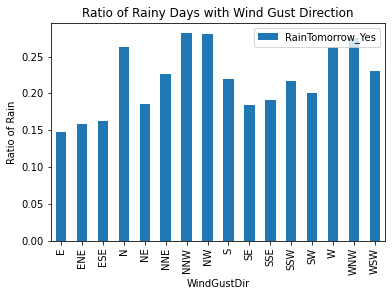

In [27]:
# Ratio of RainTomorrow_Yes (True/False) averaged for each wind direction
wind_rain = df.groupby(['WindGustDir'])[['RainTomorrow_Yes']].mean()
wind_rain.plot(kind='bar', figsize=(6,4), 
               title='Ratio of Rainy Days with Wind Gust Direction', ylabel='Ratio of Rain')

In [66]:
wind_rain = df.groupby(['WindGustDir'])[['RainTomorrow_Yes']].mean()
wind_rain9am = df.groupby(['WindDir9am'])[['RainTomorrow_Yes']].mean()
wind_rain3pm = df.groupby(['WindDir3pm'])[['RainTomorrow_Yes']].mean()

In [74]:
print(wind_rain.index)
print(wind_rain9am.index)
print(wind_rain3pm.index)

Index(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', name='WindGustDir')
Index(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', name='WindDir9am')
Index(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', name='WindDir3pm')


In [82]:
wind_data = pd.merge(wind_rain, wind_rain9am, left_index=True, right_index=True, how="outer")
wind_data1 = pd.merge(wind_data, wind_rain3pm, left_index=True, right_index=True, how="outer")
wind_data1.head()
wind_data1.columns = ['RainRatio_WindGustDir', 'RainRatio_WindDir9am', 'RainRatio_WindDir3pm']
wind_data1

,RainRatio_WindGustDir,RainRatio_WindDir9am,RainRatio_WindDir3pm
WindGustDir,,,
E,0.147043,0.143309,0.168673
ENE,0.158934,0.174196,0.175894
ESE,0.162778,0.146527,0.167078
N,0.263288,0.298520,0.272328
NE,0.184915,0.204406,0.186494
NNE,0.226176,0.262886,0.239302
NNW,0.281420,0.304511,0.277764
NW,0.281212,0.273060,0.277933
S,0.220004,0.194133,0.209047


#### Initial Observations of Wind Direction data
1. The values are different for WindGustDir and also for the 9am and 3pm columns.
2. It is not clear from this what the difference between the columns or if one will be more important for rain prediction.
3. There are null values in the 3 wind direction columns, so the rows with missing values may be removed later.
4. Other considerations: Even though this is categorical data, direction is also continuous ie. the angle of the wind? Could winds from NorthWest, West, North, etc be correlated with higher chance of rain? Could these direction values be converted to numerical in terms of degrees?

## Numerical Features

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
#look at distribution and relationship to RainTomorrow

                mean       std
RainToday                     
No         11.994339  6.503178
Yes        12.851734  6.003064


Text(0.5, 1.0, 'Distribution of MinTemp Data')

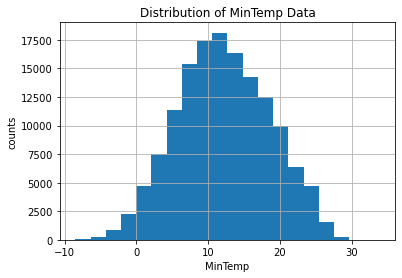

In [121]:
min_temp = pd.DataFrame(df.groupby( ['RainToday'])['MinTemp'].describe().loc[:,['mean','std']])
print(min_temp)
#distribution of humidity data
ax = (df['MinTemp']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('MinTemp')
ax.set_title('Distribution of MinTemp Data')

                  mean       std
RainToday                       
No         1015.658345  6.796419
Yes        1013.868255  7.645485


Text(0.5, 1.0, 'Distribution of Pressure3pm Data')

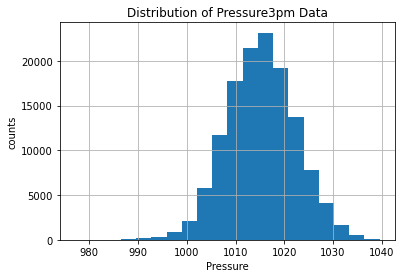

In [96]:
pressure3pm = pd.DataFrame(df.groupby( ['RainToday'])['Pressure3pm'].describe().loc[:,['mean','std']])
print(pressure3pm)
#distribution of humidity data
ax = (df['Pressure3pm']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Pressure')
ax.set_title('Distribution of Pressure3pm Data')

                mean        std
RainToday                      
No         47.253270  19.740056
Yes        66.191317  17.458148


Text(0.5, 1.0, 'Distribution of Humidity3pm Data')

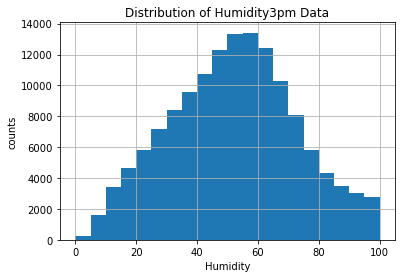

In [95]:
humidity3pm = pd.DataFrame(df.groupby( ['RainToday'])['Humidity3pm'].describe().loc[:,['mean','std']])
print(humidity3pm)
#distribution of humidity data
ax = (df['Humidity3pm']).hist(bins=20) 
ax.set_ylabel('counts')
ax.set_xlabel('Humidity')
ax.set_title('Distribution of Humidity3pm Data')

                mean        std
RainToday                      
No         47.253270  19.740056
Yes        66.191317  17.458148


Text(0.5, 1.0, 'Distribution of Cloud3pm Data')

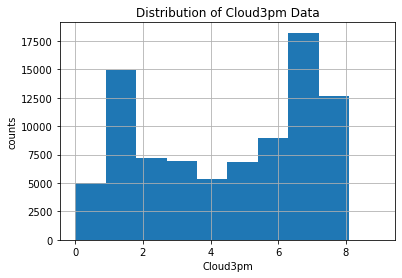

In [120]:
cloud3pm = pd.DataFrame(df.groupby( ['RainToday'])['Cloud3pm'].describe().loc[:,['mean','std']])
print(humidity3pm)
#distribution of humidity data
ax = (df['Cloud3pm']).hist(bins=10) 
ax.set_ylabel('counts')
ax.set_xlabel('Cloud3pm')
ax.set_title('Distribution of Cloud3pm Data')

                mean        std
RainToday                      
No          0.075248   0.199133
Yes        10.270354  15.486644


Text(0.5, 1.0, 'Distribution of Rainfall Data')

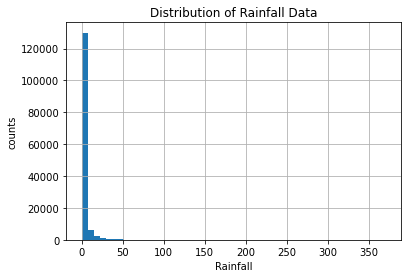

In [106]:
rainfall = pd.DataFrame(df.groupby( ['RainToday'])['Rainfall'].describe().loc[:,['mean','std']])
print(rainfall)
#distribution of rainfall data
ax = (df['Rainfall']).hist(bins=50) 
ax.set_ylabel('counts')
ax.set_xlabel('Rainfall')
ax.set_title('Distribution of Rainfall Data')

In [98]:
df['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [108]:
# Should get all values that are above 100 as these could be errors (based on the histogram)
rainfall_outliers100 = df[df['Rainfall']>100]
rainfall_outliers100

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainToday_Yes,RainTomorrow_Yes
1156,2012-03-01,Albury,17.1,20.9,104.2,NaN,NaN,SE,57.0,N,...,1002.0,1001.9,8.0,8.0,19.5,18.5,Yes,Yes,True,True
4468,2013-01-29,BadgerysCreek,18.3,28.1,116.0,NaN,NaN,WSW,37.0,W,...,1001.5,1004.4,NaN,NaN,22.3,24.9,Yes,No,True,False
5663,2016-06-05,BadgerysCreek,14.5,18.1,100.2,NaN,NaN,ENE,56.0,ENE,...,1002.5,996.9,NaN,NaN,17.7,17.1,Yes,Yes,True,True
5664,2016-06-06,BadgerysCreek,13.4,17.7,109.2,NaN,NaN,WSW,57.0,W,...,1000.4,998.9,NaN,NaN,14.6,16.9,Yes,No,True,False
9105,2009-02-17,CoffsHarbour,19.9,27.1,189.0,NaN,4.9,E,54.0,SW,...,1008.2,1007.6,8.0,7.0,20.5,26.5,Yes,Yes,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142129,2017-01-02,Darwin,23.5,30.4,109.8,NaN,2.0,WSW,46.0,S,...,1002.0,999.9,8.0,7.0,24.3,28.9,Yes,Yes,True,True
142151,2017-01-24,Darwin,22.5,28.4,145.6,NaN,0.0,W,52.0,W,...,1008.2,1005.2,8.0,8.0,24.5,25.5,Yes,Yes,True,True
142163,2017-02-05,Darwin,23.7,28.4,210.6,NaN,0.0,WNW,67.0,NNW,...,1002.5,999.9,8.0,8.0,25.9,27.4,Yes,Yes,True,True
142331,2013-03-28,Katherine,23.7,33.8,117.6,NaN,NaN,ESE,35.0,E,...,1006.4,1003.1,8.0,8.0,25.1,25.4,Yes,Yes,True,True


In [109]:
# there are 151 entries with Rainfall values above 100, this does not seem like it is an error. 
# try setting the threshhold higher to 200 and then 300)
rainfall_outliers200 = df[df['Rainfall']>200]
rainfall_outliers200

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainToday_Yes,RainTomorrow_Yes
9368,2009-11-07,CoffsHarbour,17.4,23.1,371.0,NaN,3.5,NaN,NaN,SW,...,1026.6,1025.9,8.0,5.0,18.6,22.0,Yes,Yes,True,True
10485,2013-01-28,CoffsHarbour,20.9,23.3,208.5,NaN,0.0,NNE,65.0,NE,...,1006.8,1004.2,8.0,8.0,21.5,21.3,Yes,Yes,True,True
11681,2016-06-05,CoffsHarbour,14.6,19.2,219.6,NaN,NaN,WSW,70.0,WNW,...,998.5,993.7,8.0,8.0,16.5,18.0,Yes,No,True,False
17321,2015-04-23,Newcastle,NaN,21.7,240.0,NaN,NaN,NaN,NaN,NW,...,NaN,NaN,6.0,6.0,17.5,21.0,Yes,No,True,False
17579,2016-01-06,Newcastle,15.5,NaN,216.3,NaN,NaN,NaN,NaN,SE,...,NaN,NaN,8.0,NaN,18.8,NaN,Yes,Yes,True,True
42010,2016-01-06,Williamtown,18.5,19.9,225.0,NaN,0.0,S,80.0,SSW,...,1008.5,1008.8,8.0,8.0,19.2,19.4,Yes,Yes,True,True
87242,2009-01-12,Cairns,22.3,27.4,278.4,NaN,0.0,NW,59.0,SSE,...,1003.5,999.6,8.0,8.0,24.7,25.3,Yes,Yes,True,True
87995,2011-02-04,Cairns,22.9,29.9,268.6,NaN,2.0,ENE,37.0,ENE,...,1011.1,1009.3,6.0,8.0,29.8,28.0,Yes,Yes,True,True
88222,2011-10-19,Cairns,21.1,23.1,206.2,1.4,0.0,SE,44.0,SSE,...,1017.7,1014.8,8.0,8.0,22.7,22.0,Yes,Yes,True,True
89371,2015-02-08,Cairns,23.8,31.0,247.2,NaN,2.0,E,44.0,SSE,...,1014.2,1011.4,8.0,8.0,25.3,30.0,Yes,Yes,True,True


In [110]:
rainfall_outliers300 = df[df['Rainfall']>300]
rainfall_outliers300

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainToday_Yes,RainTomorrow_Yes
9368,2009-11-07,CoffsHarbour,17.4,23.1,371.0,NaN,3.5,NaN,NaN,SW,...,1026.6,1025.9,8.0,5.0,18.6,22.0,Yes,Yes,True,True
140071,2011-02-16,Darwin,22.1,25.6,367.6,NaN,0.0,WSW,83.0,SSE,...,996.3,996.0,8.0,8.0,24.3,23.5,Yes,Yes,True,True


In [117]:
# It doesn't seem like these are errors... just very few records with large amount of rainfall.
# Now we will examine the Rainfall data that are less than or equal to 25 
rainfall_low25 = df[df['Rainfall']<=25]
print(rainfall_low25.shape)
print(df.shape)
print(139329/145460)

(139329, 25)
(145460, 25)
0.9578509555891654


#### Initial Observations about Numerical data
1. Some features could be related to RainTomorrow such as Humidity, and Cloud3pm
2. Cloud3pm and Cloud9am are not normally distributed
3. Rainfall data is very skewed to the left. ~96% of the data fall under a Rainfall value of 25, while the remaining ~4% of the data are spread out to a max value of 371.
